In [ ]:
# ETAPA 2

In [ ]:
# CARGAR DATOS
import pandas as pd
covid_semestral = pd.DataFrame()
for j in range(1,7):
  mes = f"{j:02d}"
  for i in range(1,32):
    dia = f"{i:02d}"
    download_url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_daily_reports/{mes}-{dia}-2021.csv"
    try:
      aux = pd.read_csv(download_url)
      covid_semestral = pd.concat([covid_semestral,aux],ignore_index=True)
    except Exception as e:
      print(f"El mes {mes} no tiene {dia} dias")

El mes 02 no tiene 29 dias
El mes 02 no tiene 30 dias
El mes 02 no tiene 31 dias
El mes 04 no tiene 31 dias
El mes 06 no tiene 31 dias


In [ ]:
#1. ¿Cuáles son los 10 países con más casos confirmados acumulados durante el semestre?
paises_con_mas_confirmados = covid_semestral.groupby('Country_Region')['Confirmed'].mean().sort_values(ascending=False)
display(paises_con_mas_confirmados.head(10))

,Confirmed
Country_Region,
Turkey,3.751187e+06
Argentina,2.701998e+06
Poland,2.226327e+06
Iran,2.102433e+06
South Africa,1.547787e+06
Indonesia,1.475276e+06
Czechia,1.382268e+06
Romania,9.160460e+05
Iraq,9.015821e+05


In [ ]:
#2. ¿Qué países presentan mayor tasa de letalidad (Deaths / Confirmed * 100)?
covid_semestral['letalidad'] = (covid_semestral['Deaths'] / covid_semestral['Confirmed'].replace(0, pd.NA)) * 100
letal_pais = covid_semestral.groupby('Country_Region')['letalidad'].mean().sort_values(ascending=False)
display(letal_pais)

,letalidad
Country_Region,
Yemen,23.311877
MS Zaandam,22.222222
Belgium,12.012546
Mexico,10.445552
Vanuatu,9.80663
...,...
Nauru,NaN
Palau,NaN
Tonga,NaN


In [ ]:
#3. ¿Cuántos países no registran recuperados en los datos analizados?
paises_no_recuperados = covid_semestral[(covid_semestral['Recovered'] == 0)]
num_no_recuperados = paises_no_recuperados['Country_Region'].nunique()

print(f"Cantidad de países con no recuperados: {num_no_recuperados}")

Cantidad de países con no recuperados: 28


In [ ]:
#4. ¿Qué país latinoamericano presenta la mayor cantidad de casos activos en junio 2021?

#para utilizar solamente paises de latinoamercia}
paises_latam = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba','Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua','Panamá', 'Paraguay', 'Perú', 'Dominican Republic', 'Uruguay', 'Venezuela']

latam_junio = covid_semestral[ #para filtrar la fecha por cada país
    covid_semestral['Country_Region'].isin(paises_latam) &
    (covid_semestral['Last_Update'] >= '2021-06-01') &
    (covid_semestral['Last_Update'] <= '2021-06-30')
]

latam_casos_activos = (latam_junio.groupby('Country_Region')['Active']).sum().sort_values(ascending=False) #suma los casos activos de cada pais y los ordena
display(latam_casos_activos.head(1)) #muestra el primer valor

,Active
Country_Region,
Mexico,64646710.0


Last_Update
2021-01-31    19934802
2021-02-28    21656568
2021-03-31    27891234
2021-04-30    32921939
2021-05-31    39748588
2021-06-30    44346327
Freq: ME, Name: Confirmed, dtype: int64


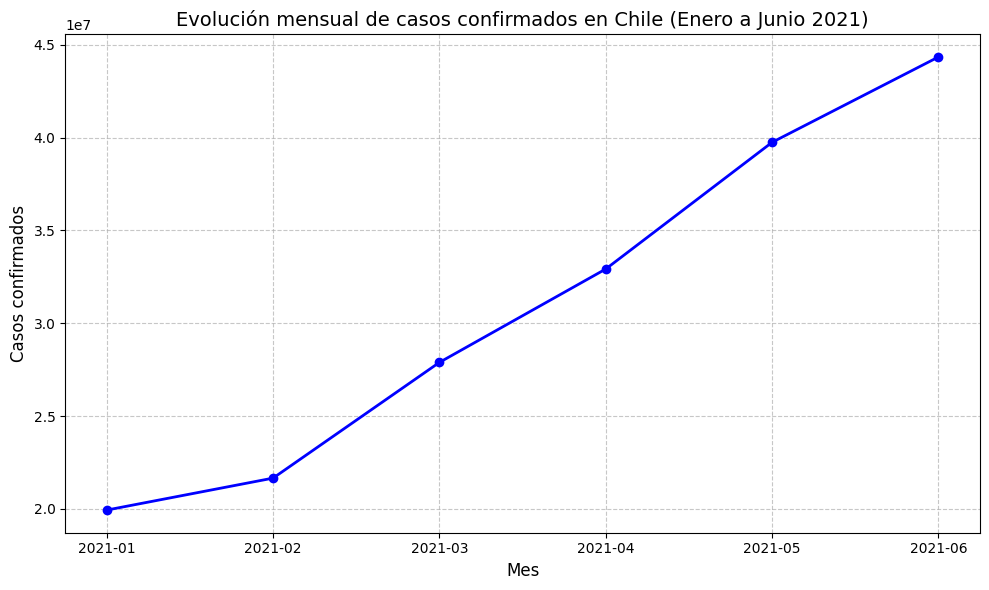

In [ ]:
#5. ¿Cómo evolucionaron los casos confirmados en Chile entre enero y junio? (gráfico de líneas).
import matplotlib.pyplot as plt
import locale

# Filtrar los datos de Chile
chile_data = covid_semestral[covid_semestral['Country_Region'] == 'Chile'].copy()

# Convertir la columna Last_Update a datetime
chile_data['Last_Update'] = pd.to_datetime(chile_data['Last_Update'])
chile_data.set_index('Last_Update', inplace=True)

# Agrupar por mes (de enero a junio)
chile_mensual = chile_data.resample('ME').sum().loc['2021-01-01':'2021-06-30', 'Confirmed']

# Convertir las fechas a nombres de mes en español
meses = chile_mensual.index.strftime('%Y-%m')

print(chile_mensual)
# Gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(meses, chile_mensual.values, marker='o', color='blue', linewidth=2)
plt.title('Evolución mensual de casos confirmados en Chile (Enero a Junio 2021)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Casos confirmados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#6. ¿Cuál fue la fecha con más nuevos casos a nivel mundial durante este período?
#covid_semestral
# ordenar datos por pais y fecha
covid_semestral_sorted = covid_semestral.sort_values(by=['Country_Region', 'Last_Update'])

# Calcular los nuevos casos por país
covid_semestral_sorted['New_Cases'] = covid_semestral_sorted.groupby('Country_Region')['Confirmed'].diff().fillna(0)


#suma total de nuevos casos por día a nivel mundial:
daily_global_new_cases = covid_semestral_sorted.groupby('Last_Update')['New_Cases'].sum().sort_values(ascending=False)
display(daily_global_new_cases.head(1))

,New_Cases
Last_Update,
2021-01-02 05:22:33,3510217.0


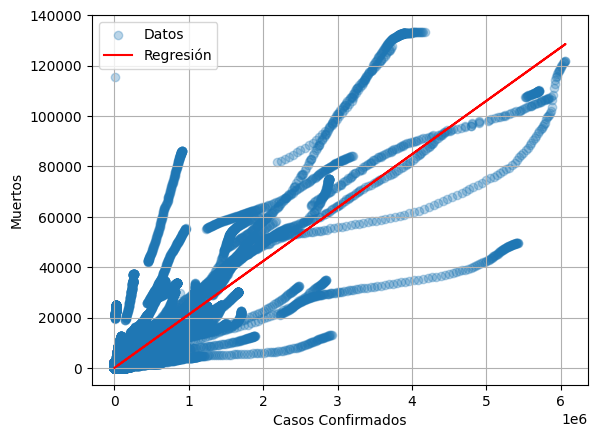

Al ser una correlacion de 0.88676034536282 , se puede decir por tabla que tienen que esta es alta, esto quiere decir que cuando uno aumenta, el otro tambien tiende a hacerlo.


In [ ]:
# 7. ¿Existe correlación entre casos confirmados y fallecidos? (gráfico de dispersión + regresión).
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

correlation = covid_semestral["Confirmed"].corr(covid_semestral['Deaths'])
df = covid_semestral.dropna(subset=['Confirmed', 'Deaths']).copy()

plt.scatter(df['Confirmed'], df['Deaths'], label='Datos',alpha=0.3)

m, b = np.polyfit(df['Confirmed'], df['Deaths'], 1)

plt.plot(df['Confirmed'], m * df['Confirmed'] + b, color='red', label='Regresión')

plt.xlabel('Casos Confirmados')
plt.ylabel('Muertos')
plt.legend()
plt.grid(True)

plt.show()

print(f'Al ser una correlacion de {correlation} , se puede decir por tabla que tienen que esta es alta, esto quiere decir que cuando uno aumenta, el otro tambien tiende a hacerlo.')

In [ ]:
# 8. Mostrar el Top 10 de países con mayor crecimiento porcentual de casos entre mayo y junio.
covid_semestral['Last_Update'] = pd.to_datetime(covid_semestral['Last_Update'], format='ISO8601')
covid_mayo_junio_sorted = covid_semestral.sort_values(by=['Country_Region', 'Last_Update'])
# Obtener el último registro de cada país en mayo y junio
ultimos_confirmados_mayo = covid_mayo_junio_sorted[covid_mayo_junio_sorted['Last_Update'].dt.month == 5].groupby('Country_Region').tail(1)
ultimos_confirmados_junio = covid_mayo_junio_sorted[covid_mayo_junio_sorted['Last_Update'].dt.month == 6].groupby('Country_Region').tail(1)
# Combinar los datos de mayo y junio para cada país
aux_df = pd.merge(ultimos_confirmados_mayo[['Country_Region', 'Confirmed']],
                     ultimos_confirmados_junio[['Country_Region', 'Confirmed']],
                     on='Country_Region',
                     suffixes=('_Mayo', '_Junio'))

aux_df['Crecimiento porcentual'] = ((aux_df['Confirmed_Junio'] - aux_df['Confirmed_Mayo']) / aux_df['Confirmed_Mayo']) * 100

import numpy as np
aux_df['Crecimiento porcentual'] = aux_df['Crecimiento porcentual'].replace([np.inf, -np.inf], np.nan) # Reemplazar infinitos con NaN
aux_df = aux_df.dropna(subset=['Crecimiento porcentual']) # Eliminar filas con NaN en crecimiento porcentual


print("Top 10 de países con mayor crecimiento porcentual de casos entre mayo y junio de 2021:")
display(aux_df.sort_values(by='Crecimiento porcentual', ascending=False).head(10))

Top 10 de países con mayor crecimiento porcentual de casos entre mayo y junio de 2021:


,Country_Region,Confirmed_Mayo,Confirmed_Junio,Crecimiento porcentual
61,Fiji,401,4144,933.416459
149,Saint Kitts and Nevis,68,443,551.470588
33,Canada,84,342,307.142857
195,Vietnam,7107,16507,132.263965
121,Mongolia,57512,113232,96.884129
175,Taiwan*,8160,14748,80.735294
102,Liberia,2179,3794,74.116567
187,Uganda,46623,79434,70.375137
31,Cambodia,29404,49255,67.511223
0,Afghanistan,70761,117158,65.568604


In [ ]:
#9. Identificar países con rebrote (un día sin casos y luego un incremento posterior).

# Ordenar los datos por país y fecha
covid_semestral_sorted = covid_semestral.sort_values(by=['Country_Region', 'Last_Update'])

# Calcular los nuevos casos por país
covid_semestral_sorted['New_Cases'] = covid_semestral_sorted.groupby('Country_Region')['Confirmed'].diff().fillna(0)

# Identificar los días con cero nuevos casos
zero_cases_days = covid_semestral_sorted[covid_semestral_sorted['New_Cases'] == 0].copy()

# Identificar los días siguientes a los días con cero casos
zero_cases_days['Next_Day_Date'] = zero_cases_days['Last_Update'] + pd.Timedelta(days=1)

# Unir con el dataframe original para obtener los casos del día siguiente
rebrote_candidates = pd.merge(zero_cases_days, covid_semestral_sorted,
                              left_on=['Country_Region', 'Next_Day_Date'],
                              right_on=['Country_Region', 'Last_Update'],
                              suffixes=('_Zero_Day', '_Next_Day'))

# Filtrar por rebrotes (nuevos casos > 0 en el día siguiente)
rebrote_countries = rebrote_candidates[rebrote_candidates['New_Cases_Next_Day'] > 0]

print("Países y fechas con posible rebrote:")
display(rebrote_countries[['Country_Region', 'Last_Update_Zero_Day', 'New_Cases_Next_Day']])

Países y fechas con posible rebrote:


,Country_Region,Last_Update_Zero_Day,New_Cases_Next_Day
0,Andorra,2021-01-12 05:22:15,96.0
4,Barbados,2021-04-08 04:21:13,13.0
5,Benin,2021-04-08 04:21:13,202.0
6,Bosnia and Herzegovina,2021-01-12 05:22:15,567.0
8,Brunei,2021-01-12 05:22:15,1.0
9,Cambodia,2021-04-08 04:21:13,113.0
10,Cameroon,2021-01-12 05:22:15,488.0
11,Cameroon,2021-04-08 04:21:13,4394.0
13,Congo (Brazzaville),2021-01-12 05:22:15,33.0
21,Eritrea,2021-01-12 05:22:15,40.0


In [ ]:
#pip install ydata-profiling #en google colab ocupar esto

In [ ]:
#10. Generar un reporte de perfilado automático
 #(ydata-profiling o pandas_profiling) que incluya distribuciones, correlaciones y
 #resumen de calidad de datos.

import pandas as pd
from ydata_profiling import ProfileReport


profile = ProfileReport(covid_semestral, title="My Data Profile")
profile.to_file("my_data_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]